# Intro a Machine Learning

## Paradigmas

### Apredizaje Supervisado

* input => Output
* 1 => 3
* 2 => 5
* 3 => 7
* 4 => 9


* 10 => ???   por que 21?  que tipo de algo es?

* input => Output
* 1 => 3.001
* 2 => 4.999
* 3 => 6.999
* 4 => 9.001


* 10 => ??? 21 +/- 0.001??

* input => Output
* 1 => impar
* 2 => par
* 3 => impar
* 4 => par


* 10 => ???   que tipo de algoritmo es?

### Apredizaje NO Supervisado

Ejemplo envolventes alcistas/bajistas de algo de agrupamiento no supervisado

INPUT = <img src='imagenes/clase_16_paradigmas_tot.png' width="480">

OUTPUT =

<img src='imagenes/clase_16_paradigmas_a.png' width="480" style="float:left;border: 1px solid #000">
<img src='imagenes/clase_16_paradigmas_b.png' width="480"  style="float:left;border: 1px solid #000"">

### Apredizaje Reforzado

Características:

* El output es una secuencia de acciones
* Hay un desafío a resolver un problema concreto (meta)
* El aprendizaje es adaptativo (algo asi como acumulativo, el agente evoluciona paso a paso de su experiencia)

Estructuras de la interacción Agente-Acciones-Ambiente-Recomensa--Estados de este paradigma:
    
    * Recompensas:
        * Positivas y Negativas:
        * Escasas o abundantes
        * Explícitas o implícitas
    * Ambientes:
        * Cambiantes/diversos o con similitudes
        * Con alto o bajo grado de aleatoriedad
        * Observables total o parcial
    * Acciones:
        * Con o sin parámetros
        * Con o sin conocimiento de variables endógenas
        * Con o sin variables exógenas (deterministas o estocásticas)

## Tipos de Algos

Supervisado

* Algos de Clasificacion:
    * Regresión Logística
    * Arboles de Decisión
    * Vectores de soporte (SVM)
    * Bosques Aleatorios
    * Naive Bayes
* Algos de Regresión
    * Regresión lineal simple
    * Regresion lineal múltiple
    * Regresiones polinomiales
    * e infinidad mas..
    
    


No supervisado

* Algos de Agrupamiento
    * Clustering jerárquico
    * K-means
    * Mezclas Gaussianas
    * Mean Shift
    * DB Scan
   
   
* Algos de reduccion de dimensionalidad
    * PCA Análisis de componentes principales 
    * SVD Descomposición de Valor Singular
    * Otros tipo incrustacion escalado etc,  LDA, Isomap, LLE
    

Reforzado

    
    
* Algos de NLP
* Manejo autonomo

LSTM forecast deep learning predict stock market

# Research previo a regresíon múltiple

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import yfinance as yf

medias = ((4, 18),(18,40),(50,200))
ventana = 60

data = yf.download('GGAL', start='2000-01-01')
data['pctChange'] = data['Adj Close'].pct_change()
data['fw'] = np.log(data['Adj Close'].shift(-ventana)/data['Adj Close'])

data['roll_vol'] = data['pctChange'].rolling(250).std() * 250**0.5
data['cruce_1'] = data['Adj Close'].rolling(medias[0][0]).mean()/data['Adj Close'].rolling(medias[0][1]).mean()-1
data['cruce_2'] = data['Adj Close'].rolling(medias[1][0]).mean()/data['Adj Close'].rolling(medias[1][1]).mean()-1
data['cruce_3'] = data['Adj Close'].rolling(medias[2][0]).mean()/data['Adj Close'].rolling(medias[2][1]).mean()-1

data.dropna(inplace=True)

df = (data[['fw','roll_vol','cruce_1','cruce_2','cruce_3']]).round(4)

df.describe()

[*********************100%***********************]  1 of 1 completed


,fw,roll_vol,cruce_1,cruce_2,cruce_3
count,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000
mean,-0.000062,0.640958,0.001106,0.000127,0.014344
std,0.360351,0.492985,0.078176,0.086289,0.296525
min,-1.958800,0.279000,-0.517100,-0.454300,-0.737900
25%,-0.169500,0.398100,-0.036700,-0.036800,-0.163600
50%,0.028100,0.478500,0.003800,0.003100,0.027300
75%,0.229700,0.687300,0.041700,0.050200,0.204700
max,1.704700,2.684400,0.389500,0.268200,0.858100


In [2]:
df

,fw,roll_vol,cruce_1,cruce_2,cruce_3
Date,,,,,
2001-07-23,-0.5070,0.5590,-0.1237,-0.1433,-0.0422
2001-07-24,-0.4817,0.5609,-0.1073,-0.1535,-0.0468
2001-07-25,-0.4691,0.5611,-0.0858,-0.1627,-0.0513
2001-07-26,-0.4498,0.5616,-0.0808,-0.1724,-0.0565
2001-07-27,-0.4927,0.5614,-0.0815,-0.1807,-0.0628
...,...,...,...,...,...
2020-09-01,-0.1602,0.8349,-0.0495,-0.0524,-0.0074
2020-09-02,-0.0972,0.8351,-0.0310,-0.0638,-0.0070
2020-09-03,-0.1659,0.8352,-0.0276,-0.0738,-0.0061


## Gráficos especiales

### Matriz de correlaciones e histogramas

<AxesSubplot:>

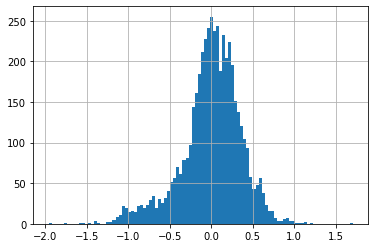

In [3]:
df.fw.hist(bins=100)

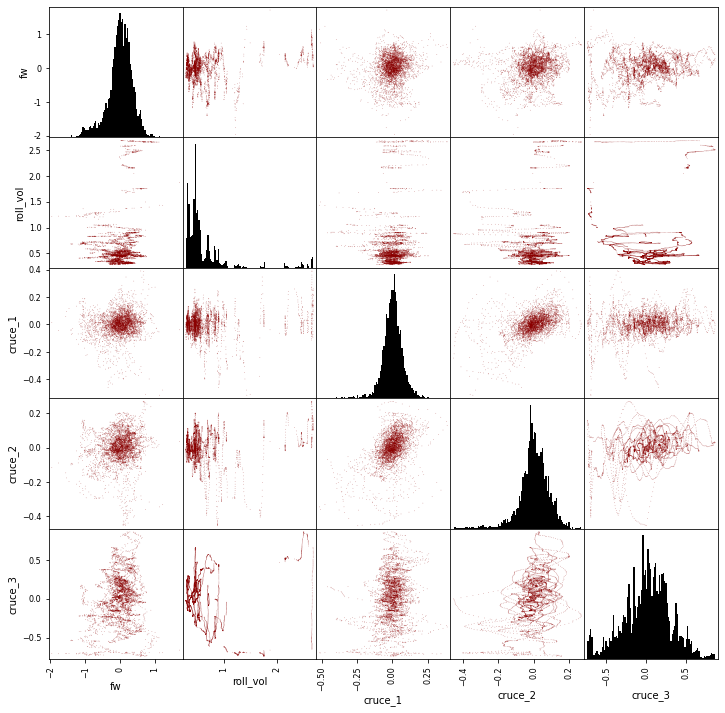

In [4]:
%matplotlib inline

pd.plotting.scatter_matrix(df, diagonal='hist', figsize=(12,12), c='darkred'
                           ,alpha=0.5, s=2, hist_kwds={'bins':100, 'color':'k'})
plt.show()

### Layout de histogramas

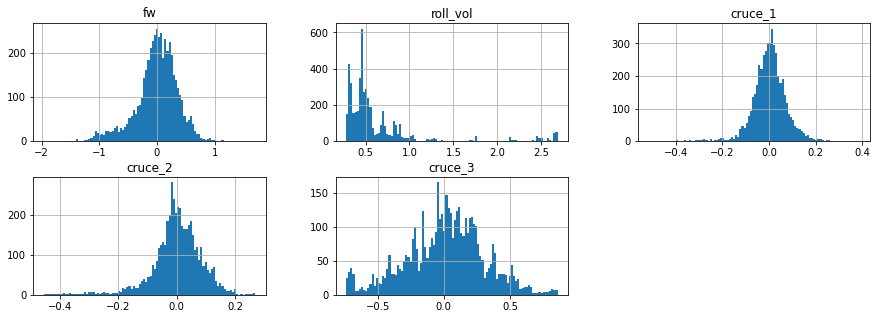

In [5]:
pd.plotting.hist_frame(df, layout=(2,3), figsize=(15,5), bins=100)
plt.show()

### Layout de boxplots

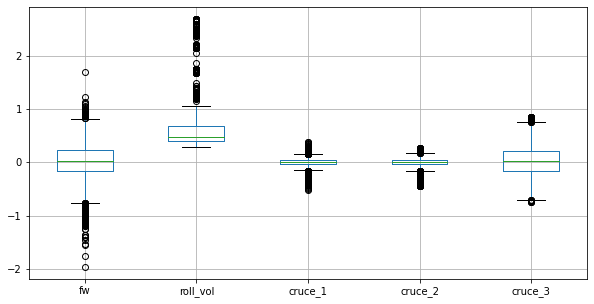

In [6]:
pd.plotting.boxplot_frame(df, figsize=(10,5))
plt.show()

### Layout de boxplots agrupados

En este caso agrupamos por régimen de volatilidad pasada, a modo de ejemplo

In [7]:
df.loc[df.roll_vol <= 0.35, 'vol_rango'] = 'baja'
df.loc[(df.roll_vol > 0.35) & (df.roll_vol <= 0.6) , 'vol_rango'] = 'media'
df.loc[df.roll_vol > 0.6, 'vol_rango'] = 'alta'
df

,fw,roll_vol,cruce_1,cruce_2,cruce_3,vol_rango
Date,,,,,,
2001-07-23,-0.5070,0.5590,-0.1237,-0.1433,-0.0422,media
2001-07-24,-0.4817,0.5609,-0.1073,-0.1535,-0.0468,media
2001-07-25,-0.4691,0.5611,-0.0858,-0.1627,-0.0513,media
2001-07-26,-0.4498,0.5616,-0.0808,-0.1724,-0.0565,media
2001-07-27,-0.4927,0.5614,-0.0815,-0.1807,-0.0628,media
...,...,...,...,...,...,...
2020-09-01,-0.1602,0.8349,-0.0495,-0.0524,-0.0074,alta
2020-09-02,-0.0972,0.8351,-0.0310,-0.0638,-0.0070,alta
2020-09-03,-0.1659,0.8352,-0.0276,-0.0738,-0.0061,alta


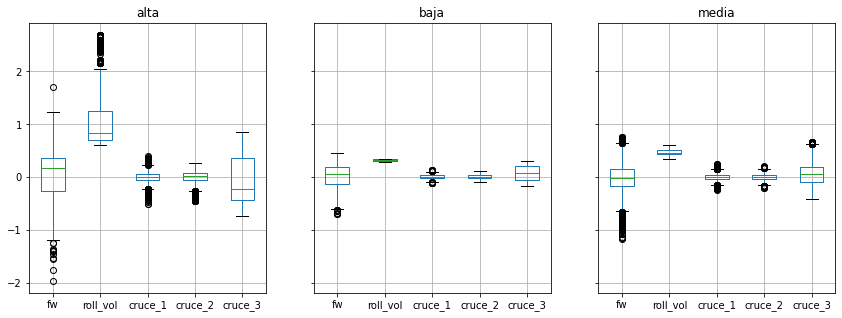

In [8]:
pd.plotting.boxplot_frame_groupby(df.groupby('vol_rango'), figsize=(14,5), layout=(1,3))
plt.show()

### Lag Plots y plots de Autocorrelación

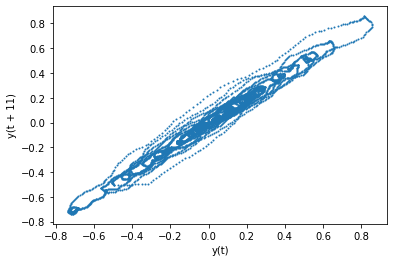

In [9]:
%matplotlib inline
pd.plotting.lag_plot(df.loc[:,['cruce_3']], lag=11, s=1)
plt.show()

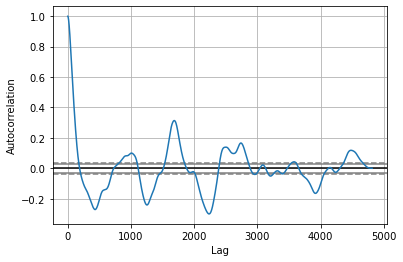

In [10]:
fig, ejes = plt.subplots()

pd.plotting.autocorrelation_plot(df['cruce_3'], ax=ejes)

#ejes.set_xlim(0,500)
#ejes.set_ylim(-0.35,0.35)

plt.show()

# Regresion multivariable

## Formuleo

con ustedes el modelo:

$$ \Large y_{i}= \beta _{0}+\beta _{1}x^1_{i} +\cdots +\beta _{p}x^p_{i}+\varepsilon _{i}=\mathbf {x} _{i}^{\mathsf {T}}{\boldsymbol {\beta }}+\varepsilon _{i} $$

se acuerdan a lo que nos llevo la regresión lineal simple?

$$ \large h(x_i) = \beta _0 + \beta_1x_i  $$

<img src='imagenes/regresion.svg'>

$$ \large  y_i = \beta_0 + \beta_1x_i + \varepsilon_i = h(x_i) + \varepsilon_i \Rightarrow \varepsilon_i = y_i -h(x_i)  $$

$$ \large \beta_1 = \frac{SS_{xy}}{SS_{xx}} $$

$$ \large \beta_0 = \bar{y} - \beta_1\bar{x} $$

$$ \large  SS_{xy} = \sum_{i=1}^{n} (x_i-\bar{x})(y_i-\bar{y}) =  \sum_{i=1}^{n} y_ix_i - n\bar{x}\bar{y} $$

$$ \large SS_{xx} = \sum_{i=1}^{n} (x_i-\bar{x})^2 =  \sum_{i=1}^{n}x_i^2 - n(\bar{x})^2 $$

La pregunta del millon

¿sirven los modelos de regresion multiple en la bolsa?

Supuestos para una regresión multivariable precisa:


<img src='imagenes/meme_cafe.gif'>

* Linealidad de las variables (a diferencia por ejemplo de regresiones polinomiales)
* No existe multicolinealidad
* Independencia de los errores
* Homocedasticidad (Varianza constante)
* No hay exogeneidad o es debil

## Uso de statsmodels

In [11]:
medias = ((4, 18),(10,60),(50,200))
ventana = 100

data = yf.download('GGAL', start='2000-01-01')
data['pctChange'] = data['Adj Close'].pct_change()
data['fw'] = np.log(data['Adj Close'].shift(-ventana)/data['Adj Close'])
data['roll_vol'] = data['pctChange'].rolling(250).std() * 250**0.5

data['cruce_1'] = data['Adj Close'].rolling(medias[0][0]).mean()/data['Adj Close'].rolling(medias[0][1]).mean()-1
data['cruce_2'] = data['Adj Close'].rolling(medias[1][0]).mean()/data['Adj Close'].rolling(medias[1][1]).mean()-1
data['cruce_3'] = data['Adj Close'].rolling(medias[2][0]).mean()/data['Adj Close'].rolling(medias[2][1]).mean()-1
data.dropna(inplace=True)

df = (data[['fw','roll_vol','cruce_1','cruce_2','cruce_3']]).round(4)

[*********************100%***********************]  1 of 1 completed


In [12]:
df

,fw,roll_vol,cruce_1,cruce_2,cruce_3
Date,,,,,
2001-07-23,-1.2105,0.5590,-0.1237,-0.2528,-0.0422
2001-07-24,-1.2134,0.5609,-0.1073,-0.2556,-0.0468
2001-07-25,-1.2151,0.5611,-0.0858,-0.2597,-0.0513
2001-07-26,-1.1818,0.5616,-0.0808,-0.2609,-0.0565
2001-07-27,-1.1811,0.5614,-0.0815,-0.2596,-0.0628
...,...,...,...,...,...
2020-07-07,-0.2063,1.0415,0.0109,0.1604,-0.1995
2020-07-08,-0.1843,1.0416,0.0359,0.1602,-0.1903
2020-07-09,-0.1890,1.0425,0.0689,0.1582,-0.1837


H0 = Es que la correlacion de todas las variables independientes (cruces y roll_vol) que explican la dependiente (fw) es cero

In [13]:
import statsmodels.formula.api as sm

reg = sm.ols('fw ~  roll_vol + cruce_1 + cruce_2 + cruce_3'  , data=df)
res  = reg.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     fw   R-squared:                       0.126
Model:                            OLS   Adj. R-squared:                  0.125
Method:                 Least Squares   F-statistic:                     171.9
Date:                Wed, 02 Dec 2020   Prob (F-statistic):          1.05e-137
Time:                        17:43:47   Log-Likelihood:                -3008.3
No. Observations:                4773   AIC:                             6027.
Df Residuals:                    4768   BIC:                             6059.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1690      0.011    -15.570      0.0

## Ensayo de pre-sensibilidad 

### Breve repaso de eleccion de tuplas al azar

In [14]:
tuple(np.random.randint(5,200, size=(3,2)))

(array([109,  67]), array([145, 173]), array([92, 67]))

In [15]:
cruces = np.random.randint(5,200, size=(3,2))
cruces.sort()
cruces

array([[126, 198],
       [169, 174],
       [ 52, 156]])

In [16]:
fast = np.random.randint(5,50, size=3)
slow = np.random.randint(50,200, size=3)
tuple(zip(fast,slow))

((21, 155), (37, 120), (18, 63))

In [17]:
fast = np.random.randint(1,30, size=3)
slow = (fast * (15*np.random.random()+1)).astype(int)+1
tuple(zip(fast,slow))

((6, 81), (9, 122), (16, 216))

### Montecarlo con StatsModel: OLS/GLS

[*********************100%***********************]  1 of 1 completed
100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00, 61.02it/s]
     index        r2                             medias
0      643  0.199022  ((12, 156), (35, 455), (38, 494))
1      893  0.181506  ((22, 285), (38, 491), (37, 478))
2      576  0.167390  ((29, 375), (36, 466), (37, 479))
3      586  0.160038  ((38, 467), (26, 320), (39, 480))
4      417  0.156635  ((31, 395), (37, 471), (38, 484))
..     ...       ...                                ...
995    184  0.012486       ((8, 9), (10, 11), (20, 21))
996    661  0.012141         ((3, 5), (14, 21), (5, 8))
997    866  0.011542         ((5, 6), (2, 3), (19, 20))
998    779  0.010506      ((2, 23), (2, 23), (26, 298))
999    726  0.008214          ((7, 19), (3, 8), (3, 8))

[1000 rows x 3 columns]


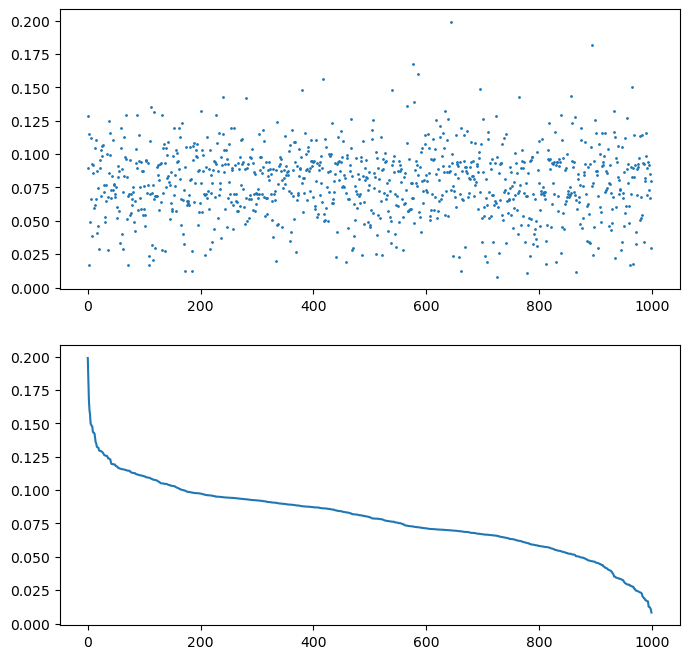

In [18]:
import statsmodels.formula.api as sm
import yfinance as yf
import numpy as np
import pandas as pd
import time, threading, sys, tqdm
import matplotlib.pyplot as plt

iteraciones = 1000
fw_window = 60

data = yf.download('BBAR', start='2010-01-01')
data['pctChange'] = data['Adj Close'].pct_change()
data['fw'] = np.log(data['Adj Close'].shift(-fw_window)/data['Adj Close'])  # logaritmico
data['fw'] = (data['Adj Close'].shift(-fw_window) / data['Adj Close'])-1  # lineal
data['roll_vol'] = data['pctChange'].rolling(250).std()  * 250**0.5

results = []

with tqdm.tqdm(total=iteraciones, file=sys.stdout) as pbar:
    for i in range(iteraciones):
        pbar.update()

        fast = np.random.randint(2,40, size=3)
        slow = (fast * (12*np.random.random()+1)).astype(int)+1        
        medias = tuple(zip(fast,slow))        
        
        data['cruce_1'] = data['Adj Close'].rolling(medias[0][0]).mean()/data['Adj Close'].rolling(medias[0][1]).mean()-1
        data['cruce_2'] = data['Adj Close'].rolling(medias[1][0]).mean()/data['Adj Close'].rolling(medias[1][1]).mean()-1
        data['cruce_3'] = data['Adj Close'].rolling(medias[2][0]).mean()/data['Adj Close'].rolling(medias[2][1]).mean()-1
        df = (data[['fw','roll_vol','cruce_1','cruce_2','cruce_3']]).round(4)    
        reg = sm.ols('fw ~  roll_vol + cruce_1 + cruce_2 + cruce_3'  , data=df)
        res  = reg.fit()
        r2 = res.rsquared
        results.append({'r2':r2, 'medias':medias})
    
res = pd.DataFrame(results)
    
plt.style.use('default')
fig, ax = plt.subplots(figsize=(8,8), nrows=2)
ax[0].scatter(res.index, res.r2, s=1)

top = res.sort_values('r2',ascending=False).reset_index()
print(top)
ax[1].plot(top.r2)

In [19]:
top.head(15)

,index,r2,medias
0,643,0.199022,"((12, 156), (35, 455), (38, 494))"
1,893,0.181506,"((22, 285), (38, 491), (37, 478))"
2,576,0.167390,"((29, 375), (36, 466), (37, 479))"
3,586,0.160038,"((38, 467), (26, 320), (39, 480))"
4,417,0.156635,"((31, 395), (37, 471), (38, 484))"
5,964,0.149984,"((37, 446), (34, 410), (10, 121))"
6,696,0.148952,"((38, 464), (10, 122), (22, 269))"
7,539,0.148087,"((9, 105), (18, 209), (39, 453))"
8,380,0.147772,"((38, 446), (11, 130), (9, 106))"
9,856,0.143806,"((17, 201), (39, 462), (23, 272))"


In [20]:
top.r2.quantile(0.9)

0.11034547063934248

<AxesSubplot:>

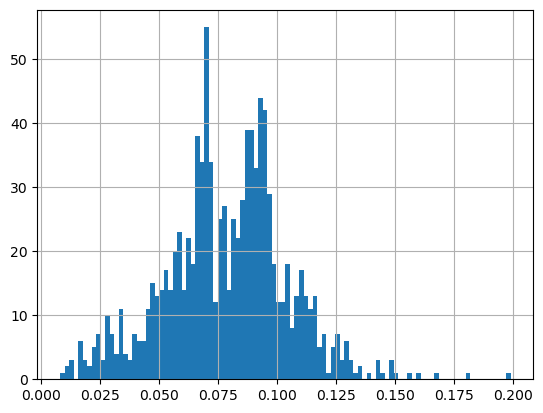

In [21]:
top.r2.hist(bins=100)

### Análisis de los resultados top

In [22]:
import statsmodels.formula.api as sm
import yfinance as yf

# Impresion de un solo modelo fijo

fw_window = 60
data = yf.download('BBAR', start='2010-01-01')
data['pctChange'] = data['Adj Close'].pct_change()
data['fw'] = np.log(data['Adj Close'].shift(-fw_window)/data['Adj Close'])  # logaritmico
data['fw'] = (data['Adj Close'].shift(-fw_window) / data['Adj Close'])-1  # lineal
data['roll_vol'] = data['pctChange'].rolling(250).std() * 250**0.5

medias = top[:1].medias[0]

data['cruce_1'] = data['Adj Close'].rolling(medias[0][0]).mean()/data['Adj Close'].rolling(medias[0][1]).mean()-1
data['cruce_2'] = data['Adj Close'].rolling(medias[1][0]).mean()/data['Adj Close'].rolling(medias[1][1]).mean()-1
data['cruce_3'] = data['Adj Close'].rolling(medias[2][0]).mean()/data['Adj Close'].rolling(medias[2][1]).mean()-1
df = (data[['fw','roll_vol','cruce_1','cruce_2','cruce_3']]).round(4)    
reg = sm.ols(formula = 'fw ~  roll_vol + cruce_1 + cruce_2 + cruce_3'  , data=df)
result  = reg.fit()
print(result.summary())

[*********************100%***********************]  1 of 1 completed
                            OLS Regression Results                            
Dep. Variable:                     fw   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     136.1
Date:                Wed, 02 Dec 2020   Prob (F-statistic):          5.72e-104
Time:                        17:44:05   Log-Likelihood:                -167.38
No. Observations:                2196   AIC:                             344.8
Df Residuals:                    2191   BIC:                             373.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

## Ensayo de pre-portabilidad

In [23]:
top.medias.iloc[0], top.r2.iloc[0]

(((12, 156), (35, 455), (38, 494)), 0.19902151588226413)

### Encapsulamos funcion de regresion multivariable

In [24]:
def modelar(data, medias):
    fw_window = 60
    data['pctChange'] = data['Adj Close'].pct_change()
    data['fw'] = (data['Adj Close'].shift(-fw_window) / data['Adj Close'])-1  # lineal
    data['roll_vol'] = data['pctChange'].rolling(250).std() * 250**0.5

    data['cruce_1'] = data['Adj Close'].rolling(medias[0][0]).mean()/data['Adj Close'].rolling(medias[0][1]).mean()-1
    data['cruce_2'] = data['Adj Close'].rolling(medias[1][0]).mean()/data['Adj Close'].rolling(medias[1][1]).mean()-1
    data['cruce_3'] = data['Adj Close'].rolling(medias[2][0]).mean()/data['Adj Close'].rolling(medias[2][1]).mean()-1
    df = (data[['fw','roll_vol','cruce_1','cruce_2','cruce_3']]).round(4)    
    reg = sm.ols(formula = 'fw ~  roll_vol + cruce_1 + cruce_2 + cruce_3'  , data=df)
    result  = reg.fit()
    return result

In [25]:
data = yf.download('PAM', start='2010-01-01')
medias = top.medias.iloc[0]

print(modelar(data, medias).rsquared)

[*********************100%***********************]  1 of 1 completed
0.14067117857937417


### Preparamos los datos del activo original para cruzar

In [26]:
top[:50]

,index,r2,medias
0,643,0.199022,"((12, 156), (35, 455), (38, 494))"
1,893,0.181506,"((22, 285), (38, 491), (37, 478))"
2,576,0.167390,"((29, 375), (36, 466), (37, 479))"
3,586,0.160038,"((38, 467), (26, 320), (39, 480))"
4,417,0.156635,"((31, 395), (37, 471), (38, 484))"
5,964,0.149984,"((37, 446), (34, 410), (10, 121))"
6,696,0.148952,"((38, 464), (10, 122), (22, 269))"
7,539,0.148087,"((9, 105), (18, 209), (39, 453))"
8,380,0.147772,"((38, 446), (11, 130), (9, 106))"
9,856,0.143806,"((17, 201), (39, 462), (23, 272))"


In [27]:
lista_r2 = list(top[:50].r2)
lista_medias = list(top[:50].medias)

In [28]:
results_r2 = []
for medias in lista_medias:
    results_r2.append(modelar(data, medias).rsquared)
    
results_r2[:10]

[0.14067117857937417,
 0.11085453901238873,
 0.1114522872696756,
 0.10364817380185354,
 0.12423368970253312,
 0.12006711591784336,
 0.17014125467365893,
 0.14137449008308522,
 0.08902360552259536,
 0.10556517720594816]

In [29]:
results_r2 = [modelar(data, medias).rsquared for medias in lista_medias]
results_r2[:10]

[0.14067117857937417,
 0.11085453901238873,
 0.1114522872696756,
 0.10364817380185354,
 0.12423368970253312,
 0.12006711591784336,
 0.17014125467365893,
 0.14137449008308522,
 0.08902360552259536,
 0.10556517720594816]

[*********************100%***********************]  1 of 1 completed


<AxesSubplot:>

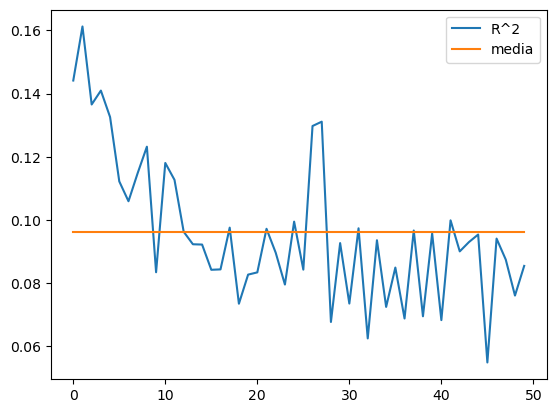

In [30]:
data = yf.download('GGAL', start='2010-01-01')

results_r2 = [modelar(data, medias).rsquared for medias in lista_medias]
df = pd.DataFrame(results_r2, columns=['R^2'])
df['media'] = df['R^2'].mean()
df.plot()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


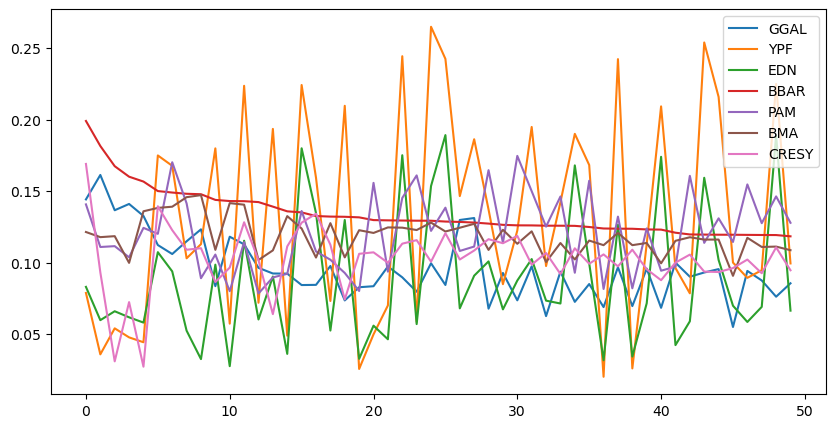

In [31]:
fig, ax = plt.subplots(figsize=(10,5))
tickers = ['GGAL','YPF','EDN','BBAR','PAM','BMA','CRESY']
for ticker in tickers:
    data = yf.download(ticker, start='2010-01-01')
    results_r2 = [modelar(data, medias).rsquared for medias in lista_medias]
    df = pd.DataFrame(results_r2)
    ax.plot(df, label=ticker)

plt.legend()
plt.show()

In [32]:
data

,Open,High,Low,Close,Adj Close,Volume,pctChange,fw,roll_vol,cruce_1,cruce_2,cruce_3
Date,,,,,,,,,,,,
2010-01-04,14.233432,14.698318,14.233432,14.589516,12.352945,157900,NaN,-0.054915,NaN,NaN,NaN,NaN
2010-01-05,14.638971,15.242334,14.589516,15.242334,12.905686,193200,0.044746,-0.094744,NaN,NaN,NaN,NaN
2010-01-06,15.331355,15.440158,15.182987,15.311573,12.964310,188400,0.004542,-0.111757,NaN,NaN,NaN,NaN
2010-01-07,15.262116,15.796242,15.262116,15.717112,13.307680,140800,0.026486,-0.126495,NaN,NaN,NaN,NaN
2010-01-08,15.489614,15.697330,15.390702,15.430267,13.064809,92600,-0.018250,-0.111538,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-25,3.910000,4.040000,3.840000,3.980000,3.980000,54100,0.010152,NaN,0.843957,-0.134586,0.162981,0.187168
2020-11-27,3.980000,4.020000,3.960000,3.990000,3.990000,52700,0.002513,NaN,0.843243,-0.122776,0.167849,0.187512
2020-11-30,4.020000,4.030000,3.910000,3.970000,3.970000,99000,-0.005013,NaN,0.842761,-0.114143,0.166302,0.185346


# Arboles de decisión

<img src='imagenes/arboles_intro.png'>

## Preparamos los datos

In [33]:
import yfinance as yf, numpy as np


# Parametros de entrada
medias =  ((5, 64), (6, 76), (35, 442))
fw_window = 60

# Preparo los datos
src = yf.download('AAPL', start='2000-01-01')
src['pctChange'] = src['Adj Close'].pct_change()


#src['fw'] = src['Adj Close'].pct_change(-fw_window) # da cambiado de signo
             
src['fw'] = (src['Adj Close'].shift(-fw_window) / src['Adj Close'])-1  


src['roll_vol'] = src['pctChange'].rolling(250).std() * 250**0.5
src['cruce_1'] = src['Adj Close'].rolling(medias[0][0]).mean()/src['Adj Close'].rolling(medias[0][1]).mean()-1
src['cruce_2'] = src['Adj Close'].rolling(medias[1][0]).mean()/src['Adj Close'].rolling(medias[1][1]).mean()-1
src['cruce_3'] = src['Adj Close'].rolling(medias[2][0]).mean()/src['Adj Close'].rolling(medias[2][1]).mean()-1
src['target'] = 0
src.loc[src.fw >= 0 , 'target'] = 1
src_full = src.copy()
src = src.round(4).dropna()

y = list(src['target'])
X = list( zip( list(src['roll_vol']),list(src['cruce_1']),list(src['cruce_2']),list(src['cruce_3']) ) )  

X[:10]

[*********************100%***********************]  1 of 1 completed


[(0.6599, -0.1643, -0.1905, -0.5084),
 (0.6567, -0.1486, -0.1841, -0.5093),
 (0.6587, -0.1241, -0.1668, -0.5095),
 (0.6607, -0.1007, -0.1414, -0.5092),
 (0.6596, -0.0768, -0.1207, -0.5083),
 (0.6568, -0.0548, -0.1018, -0.5074),
 (0.6566, -0.0291, -0.0833, -0.5063),
 (0.6509, -0.021, -0.0701, -0.5064),
 (0.6531, -0.0123, -0.0559, -0.5054),
 (0.6501, -0.0042, -0.0476, -0.5046)]

In [34]:
src

,Open,High,Low,Close,Adj Close,Volume,pctChange,fw,roll_vol,cruce_1,cruce_2,cruce_3,target
Date,,,,,,,,,,,,,
2001-10-08,0.2780,0.2920,0.2768,0.2893,0.2475,207984000,0.0037,0.4556,0.6599,-0.1643,-0.1905,-0.5084,1
2001-10-09,0.2866,0.2893,0.2791,0.2857,0.2445,174025600,-0.0123,0.4806,0.6567,-0.1486,-0.1841,-0.5093,1
2001-10-10,0.2875,0.3009,0.2848,0.3004,0.2570,307759200,0.0512,0.3615,0.6587,-0.1241,-0.1668,-0.5095,1
2001-10-11,0.3021,0.3168,0.3009,0.3168,0.2711,334163200,0.0547,0.2745,0.6607,-0.1007,-0.1414,-0.5092,1
2001-10-12,0.3091,0.3229,0.3011,0.3216,0.2752,287812000,0.0152,0.2021,0.6596,-0.0768,-0.1207,-0.5083,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-01,132.7600,134.8000,130.5300,134.1800,133.9489,152470100,0.0398,-0.1338,0.4197,0.2726,0.3114,0.7522,0
2020-09-02,137.5900,137.9800,127.0000,131.4000,131.1737,200119000,-0.0207,-0.1112,0.4204,0.2723,0.3130,0.7620,0
2020-09-03,126.9100,128.8400,120.5000,120.8800,120.6718,257599600,-0.0801,-0.0134,0.4287,0.2564,0.2960,0.7682,0


In [35]:
y[:10]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

## Separamos los datos de entrenamiento de los de validación

In [36]:
len(y)

4763

In [37]:
from sklearn.model_selection import train_test_split

# Entrenamos con el 40% de los datos al modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [38]:
len(X_train)

2857

In [39]:
len(X_test)

1906

In [40]:
X_train[:10]

[(0.4378, -0.0008, -0.0072, -0.2287),
 (0.4445, -0.0796, -0.053, 0.3065),
 (0.2779, -0.1983, -0.2071, 0.0516),
 (0.4191, -0.1491, -0.1883, 0.1209),
 (0.2167, -0.0045, 0.0125, 0.3642),
 (0.2746, 0.0431, 0.0125, -0.1097),
 (0.4043, 0.2944, 0.3517, 1.1227),
 (0.3072, 0.0466, 0.0588, -0.0215),
 (0.2962, 0.0451, 0.0358, 0.4085),
 (0.4542, 0.0616, 0.0486, -0.2139)]

In [41]:
print(len(X_train),len(y_train),len(X_test),len(y_test))

2857 2857 1906 1906


## Importamos el modelo

In [42]:
from sklearn.tree import DecisionTreeClassifier
modelo = DecisionTreeClassifier(criterion = 'entropy', max_depth=5) # por default es gini, otros entropy

$$ {\text{Ganancia de información, Entropia}}(S)= \large - \sum _{i=1}^{n}p_{i}\log _{2}p_{i} $$

$$ {\text{Impureza de Gini} \hspace{0.5cm}  \large I_{G}(p)=\sum _{i=1}^{m}p_{i}(1-p_{i})=\sum _{i=1}^{m}(p_{i}-{p_{i}}^{2})=1-\sum _{i=1}^{m}{p_{i}}^{2}} $$

Ver Shannon y Weaber formulacion matematica de la teoría de la información

## Entrenamiento

In [43]:
modelo.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

## Corremos el modelo

In [44]:
y_pred = modelo.predict(X_test)
y_pred

array([1, 0, 0, ..., 1, 1, 1])

In [45]:
import pandas as pd
pd.DataFrame(y_pred).groupby(0).size()

0
0     188
1    1718
dtype: int64

In [46]:
modelo.predict(X_test)

array([1, 0, 0, ..., 1, 1, 1])

## Obtenemos las predicciones de probabilidad 

In [47]:
modelo.predict_proba(X_test)

array([[0.23489933, 0.76510067],
       [0.65517241, 0.34482759],
       [0.65517241, 0.34482759],
       ...,
       [0.21305595, 0.78694405],
       [0.21305595, 0.78694405],
       [0.21305595, 0.78694405]])

## Matriz de Confusión

<img src='imagenes/machine_learning_mc_sklearn.png' width='600'>

In [48]:
from sklearn.metrics import confusion_matrix

m = np.array(confusion_matrix(y_test, y_pred, normalize=None))
m

array([[ 129,  429],
       [  59, 1289]], dtype=int64)

In [49]:
m = np.array(confusion_matrix(y_test, y_pred, normalize='all'))
m

array([[0.06768101, 0.2250787 ],
       [0.03095488, 0.67628541]])

In [50]:
m = np.array(confusion_matrix(y_test, y_pred, normalize='pred'))
m

array([[0.68617021, 0.24970896],
       [0.31382979, 0.75029104]])

In [51]:
m = np.array(confusion_matrix(y_test, y_pred, normalize='true'))
m

array([[0.2311828 , 0.7688172 ],
       [0.04376855, 0.95623145]])

In [52]:
from sklearn.metrics import confusion_matrix

m = np.array(confusion_matrix(y_test, y_pred, normalize='all')).round(2)

matriz = {'manteca':m[1][1], 'mike oscilator':m[1][0],'all in':m[0][1], 'yo te avise':m[0][0]}

resumen = {'aciertos' : f"{matriz['manteca']+matriz['yo te avise']:.1%}", 
           'sesgo +': f"{matriz['manteca']+matriz['all in']:.1%}"}

print('Arboles de decisión: \n',m,'\nPorcentajes:\n',matriz,'\n',resumen)

Arboles de decisión: 
 [[0.07 0.23]
 [0.03 0.68]] 
Porcentajes:
 {'manteca': 0.68, 'mike oscilator': 0.03, 'all in': 0.23, 'yo te avise': 0.07} 
 {'aciertos': '75.0%', 'sesgo +': '91.0%'}


### Matriz de confusión "a mano"

In [53]:
resultados = list(zip(y_test, y_pred))

manteca = 0
mike = 0
yoteavise = 0
allin = 0

for resultado in resultados:
    real = resultado[0]
    prediccion = resultado[1]
    
    if (real==0) & (prediccion==0):
        yoteavise +=1
    if (real==0) & (prediccion==1):
        allin +=1
    if (real==1) & (prediccion==0):
        mike +=1
    if (real==1) & (prediccion==1):
        manteca +=1
    
yoteavise, allin, mike, manteca

(129, 429, 59, 1289)

In [54]:
confusion_matrix(y_test, y_pred)

array([[ 129,  429],
       [  59, 1289]], dtype=int64)

### Ojo con la definición de tuplas

Si definimos una tupla como x=(1), me va a asignar el entero 1 a la variable "x"

Si quisiera que me asigne la tupla con el valor 1 como único valor debo poner x=(1,)

In [55]:
a = 5
b = (5)
c = (5,)

In [56]:
d = tuple((5,))

In [57]:
d

(5,)

In [58]:
type(c)

tuple

In [59]:
type(b)

int

## Vemos predicción de algún valor

In [60]:
datosHoy = [0.462406, -0.003938, -0.003936, 0.595982]

In [61]:
modelo.predict((datosHoy,))

array([0])

In [62]:
modelo.predict(([0.462406, -0.003938, -0.003936, 0.595982],))

array([0])

In [63]:
modelo.predict_proba((datosHoy,))

array([[0.65517241, 0.34482759]])

In [64]:
ultimos = list(zip( list(src_full['roll_vol']),list(src_full['cruce_1']),list(src_full['cruce_2']),list(src_full['cruce_3']) ) )  
ultimos = ultimos[-5:]
prediccion_ultimos = modelo.predict(ultimos)
print('\nPrediccion Ultimos 5 valores actuales\n',prediccion_ultimos)


Prediccion Ultimos 5 valores actuales
 [0 0 0 0 0]


In [65]:
ultimos = list(zip( list(src_full['roll_vol']),list(src_full['cruce_1']),list(src_full['cruce_2']),list(src_full['cruce_3']) ) )  
ultimos = ultimos[-5:]
prediccion_ultimos = modelo.predict_proba(ultimos)
print('\nPrediccion Ultimos 5 valores actuales\n',prediccion_ultimos)


Prediccion Ultimos 5 valores actuales
 [[0.65517241 0.34482759]
 [0.65517241 0.34482759]
 [0.65517241 0.34482759]
 [0.65517241 0.34482759]
 [0.65517241 0.34482759]]


## Graficamos el modelo

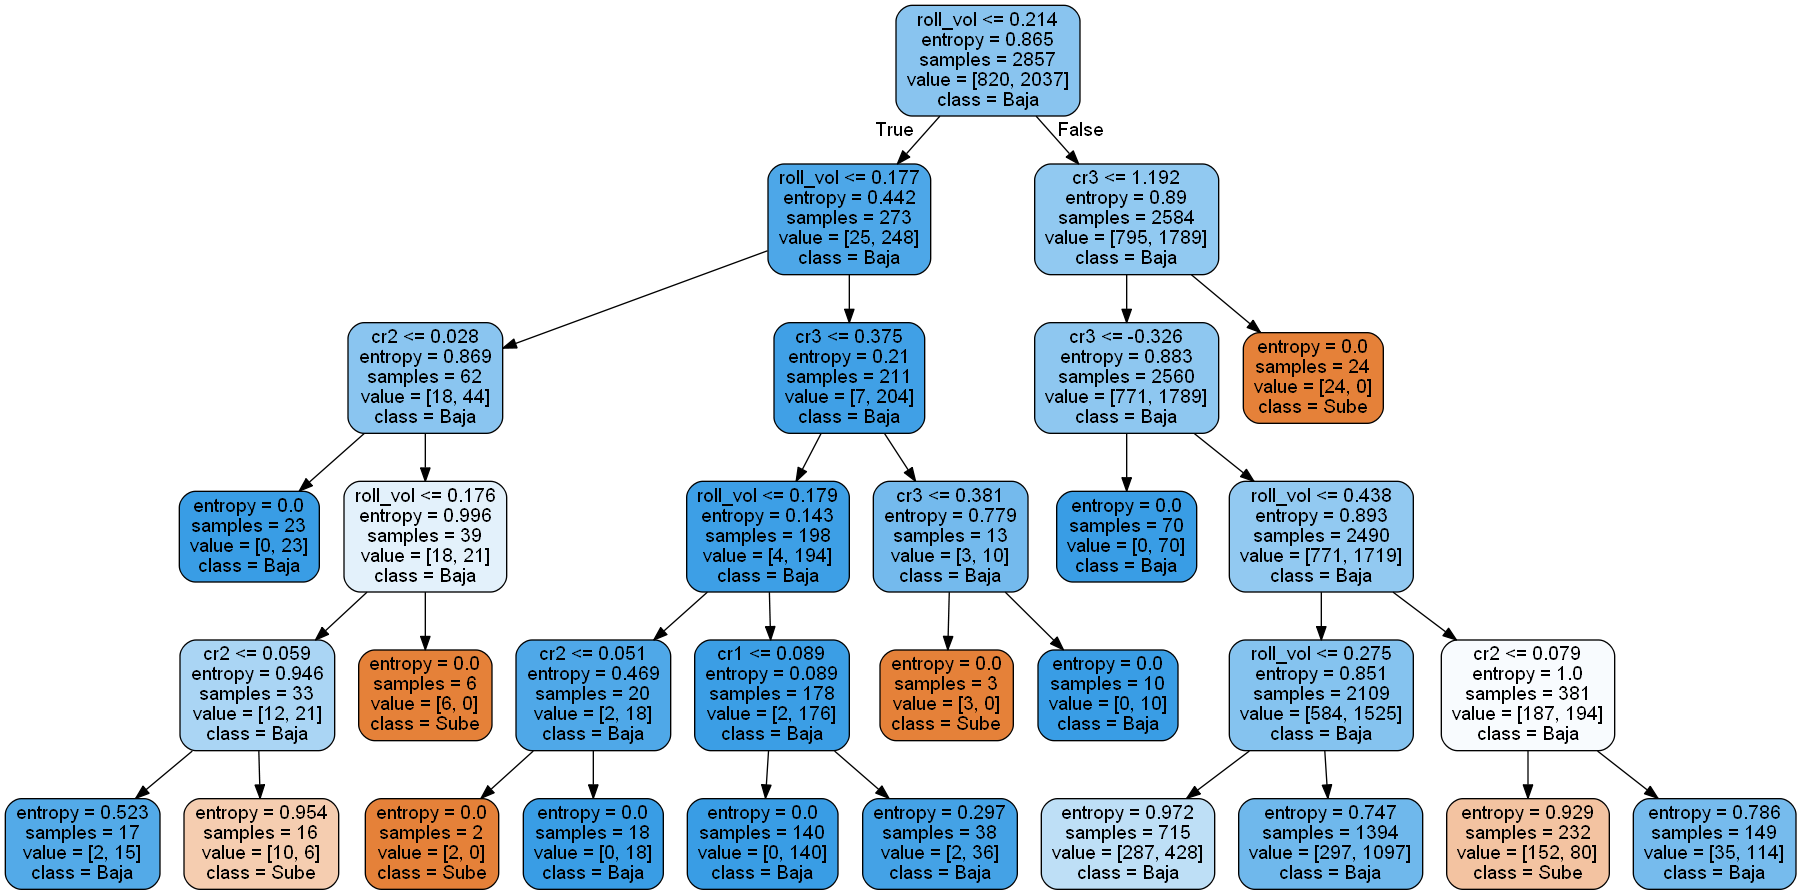

In [66]:
# pip install pydotplus


from IPython.display import Image  
from sklearn import tree
import pydotplus
import os
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

cols = ['roll_vol','cr1','cr2','cr3']
targets = ['Sube','Baja']

dot_data = tree.export_graphviz(modelo, out_file=None, feature_names=cols, 
                                class_names=targets, rounded = True, filled= True)

graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

## Overfiteamos

<AxesSubplot:>

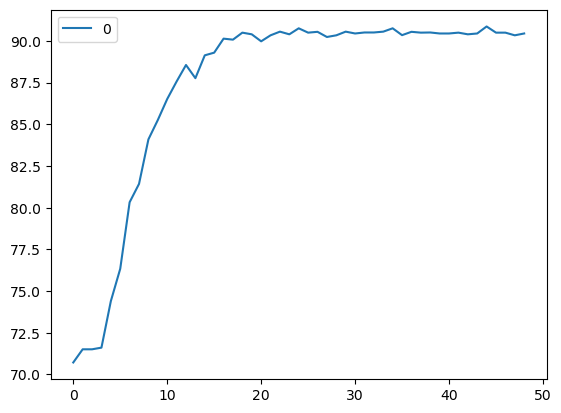

In [67]:
aciertos = []
for i in range(1,50):
    modelo = DecisionTreeClassifier(criterion = 'entropy', max_depth=i) #Definimos modelo
    modelo.fit(X_train, y_train) # Entrenamos
    y_pred = modelo.predict(X_test) # Corremos
    m = np.array(confusion_matrix(y_test, y_pred)) # medimos
    mp = (m/m.sum().sum() *100).round(2)
    aciertos.append( round(mp[0][0]+mp[1][1],2) )

aciertosTot = pd.DataFrame(aciertos)
aciertosTot.plot()

# Repaso en limpio

In [68]:
import yfinance as yf, numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix


# Parametros de entrada
medias =  ((9, 140), (28, 433), (6, 93))
fw_window = 60

# Preparo los datos
src = yf.download('GGAL', start='2000-01-01')
src['pctChange'] = src['Adj Close'].pct_change()
src['fw'] = (src['Adj Close'].shift(-fw_window) / src['Adj Close'])-1  
src['roll_vol'] = src['pctChange'].rolling(250).std() * 250**0.5
src['cruce_1'] = src['Adj Close'].rolling(medias[0][0]).mean()/src['Adj Close'].rolling(medias[0][1]).mean()-1
src['cruce_2'] = src['Adj Close'].rolling(medias[1][0]).mean()/src['Adj Close'].rolling(medias[1][1]).mean()-1
src['cruce_3'] = src['Adj Close'].rolling(medias[2][0]).mean()/src['Adj Close'].rolling(medias[2][1]).mean()-1
src['target'] = np.where(src.fw>=0, 1,0)
src_full = src.copy()
src = src.round(4).dropna()

y = list(src['target'])
X = list( zip( list(src['roll_vol']),list(src['cruce_1']),list(src['cruce_2']),list(src['cruce_3']) ) )  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

modelo = DecisionTreeClassifier(criterion = 'entropy', max_depth=5) 
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)

m = np.array(confusion_matrix(y_test, y_pred, normalize='all')).round(2)

ultimos = list(zip( list(src_full['roll_vol']),list(src_full['cruce_1']),
                   list(src_full['cruce_2']),list(src_full['cruce_3']) ) )  

ultimos = ultimos[-5:]
prediccion_ultimos = modelo.predict_proba(ultimos)

m, prediccion_ultimos

[*********************100%***********************]  1 of 1 completed


(array([[0.25, 0.18],
        [0.14, 0.43]]),
 array([[0.03703704, 0.96296296],
        [0.03703704, 0.96296296],
        [0.03703704, 0.96296296],
        [0.03703704, 0.96296296],
        [0.03703704, 0.96296296]]))

# Se acuerdan de la serializacion?

In [69]:
import pickle

with open('modelo_arboles.dat' , 'wb') as file:
    pickle.dump(modelo, file)

In [3]:
import yfinance as yf, numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

In [1]:
import pickle

In [7]:

# Parametros de entrada
medias =  ((9, 140), (28, 433), (6, 93))
fw_window = 60

# Preparo los datos
src = yf.download('GGAL', start='2000-01-01')
src['pctChange'] = src['Adj Close'].pct_change()
src['fw'] = (src['Adj Close'].shift(-fw_window) / src['Adj Close'])-1  
src['roll_vol'] = src['pctChange'].rolling(250).std() * 250**0.5
src['cruce_1'] = src['Adj Close'].rolling(medias[0][0]).mean()/src['Adj Close'].rolling(medias[0][1]).mean()-1
src['cruce_2'] = src['Adj Close'].rolling(medias[1][0]).mean()/src['Adj Close'].rolling(medias[1][1]).mean()-1
src['cruce_3'] = src['Adj Close'].rolling(medias[2][0]).mean()/src['Adj Close'].rolling(medias[2][1]).mean()-1
src['target'] = np.where(src.fw>=0, 1,0)
src_full = src.copy()
src = src.round(4).dropna()

y = list(src['target'])
X = list( zip( list(src['roll_vol']),list(src['cruce_1']),list(src['cruce_2']),list(src['cruce_3']) ) )  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

[*********************100%***********************]  1 of 1 completed


In [4]:
with open('modelo_arboles.dat' , 'rb') as file:
    m_loaded = pickle.load(file)

In [5]:
m_loaded.tree_

In [8]:
modelo = m_loaded
y_pred = modelo.predict(X_test)

m = np.array(confusion_matrix(y_test, y_pred, normalize='all')).round(2)

ultimos = list(zip( list(src_full['roll_vol']),list(src_full['cruce_1']),
                   list(src_full['cruce_2']),list(src_full['cruce_3']) ) )  

ultimos = ultimos[-5:]
prediccion_ultimos = modelo.predict_proba(ultimos)

m, prediccion_ultimos

(array([[0.25, 0.18],
        [0.13, 0.44]]),
 array([[0.03703704, 0.96296296],
        [0.03703704, 0.96296296],
        [0.03703704, 0.96296296],
        [0.03703704, 0.96296296],
        [0.03703704, 0.96296296]]))

# Regresión Logística

## Ejemplo con statsmodels (via seaborn)

In [11]:
import seaborn as sns
sns.set(font_scale = 1.5 , style="white", rc={'figure.dpi':80})

In [9]:
import yfinance as yf
import pandas as pd
import numpy as np

fast, slow = 40,200
data = yf.download('AAPL', auto_adjust=True, start='2010-01-01')
data['GAP'] = (data.Open / data.Close.shift() - 1)*100
data['Trend'] = np.where(data.Close > data.Close.rolling(100).mean(), 'Bull', 'Bear')
data['Mov Intra'] = (data.Close/data.Open -1)*100
data['Suba Intra'] = np.where(data.Close > data.Open, 1, 0)
data = data.dropna()
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume,GAP,Trend,Mov Intra,Suba Intra
Date,,,,,,,,,
2010-01-05,6.557910,6.588163,6.516656,6.551187,601904800,0.275669,Bear,-0.102519,0
2010-01-06,6.551189,6.577164,6.440261,6.446983,552160000,0.000025,Bear,-1.590633,0
2010-01-07,6.470819,6.478459,6.388311,6.435065,477131200,0.369719,Bear,-0.552538,0
2010-01-08,6.426508,6.478458,6.388615,6.477847,447610800,-0.132986,Bear,0.798864,1
2010-01-11,6.502905,6.509017,6.369974,6.420702,462229600,0.386830,Bear,-1.264095,0
...,...,...,...,...,...,...,...,...,...
2020-11-25,115.550003,116.750000,115.169998,116.029999,76499200,0.329951,Bull,0.415401,1
2020-11-27,116.570000,117.489998,116.220001,116.589996,46691300,0.465398,Bull,0.017154,1
2020-11-30,116.970001,120.970001,116.809998,119.050003,169410200,0.325933,Bull,1.778235,1


## Regresion lineal

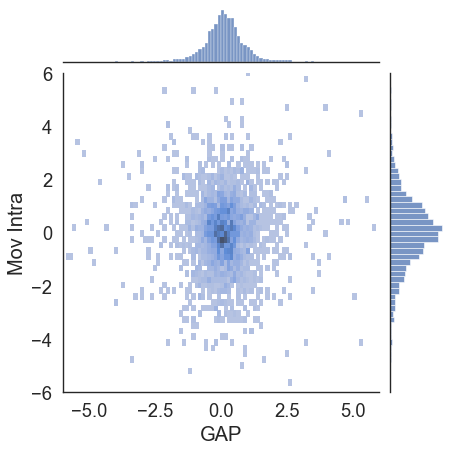

In [13]:
sns.jointplot(data=data, x='GAP', y='Mov Intra', xlim=(-6,6), ylim=(-6,6), kind="hist")

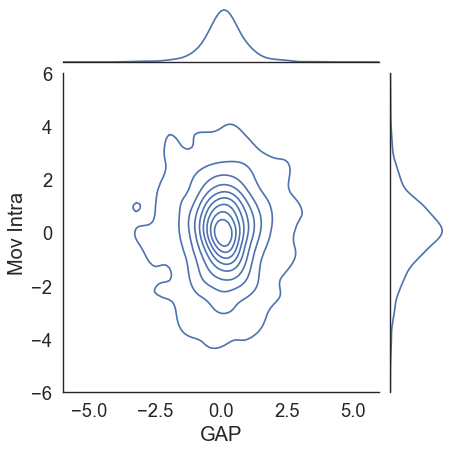

In [12]:
sns.jointplot(data=data, x='GAP', y='Mov Intra', xlim=(-6,6), ylim=(-6,6), kind="kde")

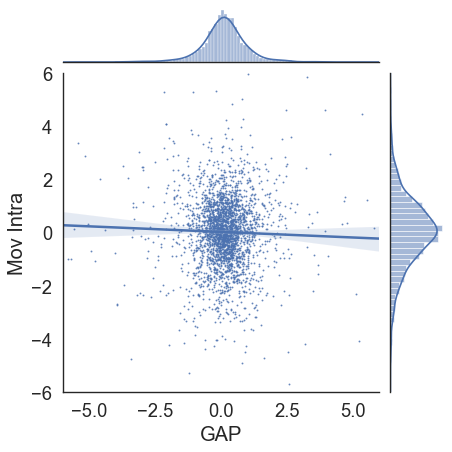

In [76]:
sns.jointplot(data=data, x='GAP', y='Mov Intra', xlim=(-6,6), ylim=(-6,6), kind="reg", marker='.', scatter_kws={'s':2})

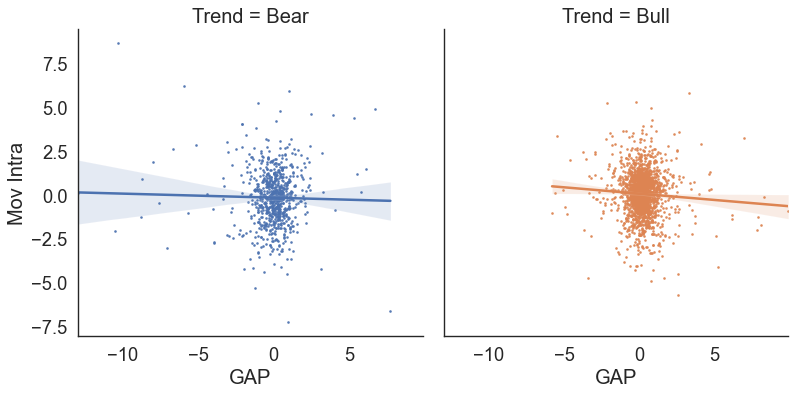

In [77]:
sns.lmplot(data=data, x='GAP', y='Mov Intra', col='Trend', hue='Trend', scatter_kws={'s':2})

## Regresion Logistica

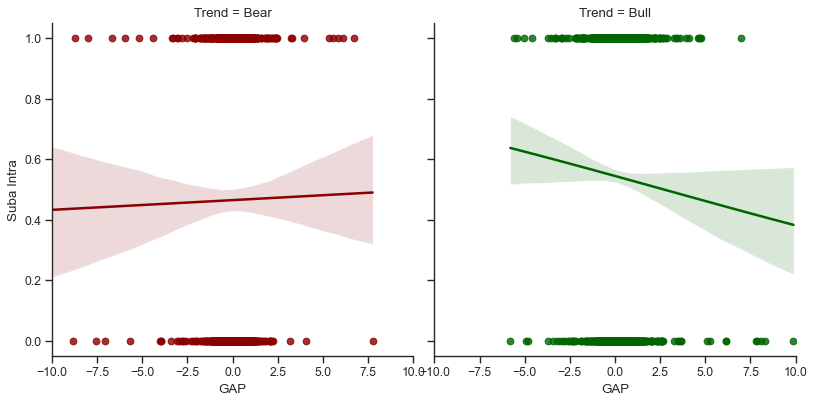

In [78]:
sns.set_theme(style="ticks")


g = sns.lmplot(x="GAP", y="Suba Intra", col="Trend", hue="Trend", data=data, 
                palette=['darkred','darkgreen'], logistic=True, truncate=True)

g.set(xlim=(-10, 10), ylim=(-.05, 1.05))

## Ejemplo con sklearn

### Preparo los datos

In [79]:
# Parametros de entrada
medias =  ((9, 140), (28, 433), (6, 93))
fw_window = 60

# Preparo los datos
src = yf.download('GGAL', start='2000-01-01')
src['pctChange'] = src['Adj Close'].pct_change()
src['fw'] = (src['Adj Close'].shift(-fw_window) / src['Adj Close'])-1  
src['roll_vol'] = src['pctChange'].rolling(250).std() * 250**0.5
src['cruce_1'] = src['Adj Close'].rolling(medias[0][0]).mean()/src['Adj Close'].rolling(medias[0][1]).mean()-1
src['cruce_2'] = src['Adj Close'].rolling(medias[1][0]).mean()/src['Adj Close'].rolling(medias[1][1]).mean()-1
src['cruce_3'] = src['Adj Close'].rolling(medias[2][0]).mean()/src['Adj Close'].rolling(medias[2][1]).mean()-1
src['target'] = 0
src.loc[src.fw >= 0 , 'target'] = 1
src_full = src.copy()
src = src.round(4).dropna()

y = list(src['target'])
X = list( zip( list(src['roll_vol']),list(src['cruce_1']),list(src['cruce_2']),list(src['cruce_3']) ) )  

[*********************100%***********************]  1 of 1 completed


### Separamos los datos de entrenamiento de los de validación

In [80]:
from sklearn.model_selection import train_test_split

# Entrenamos con el 40% de los datos al modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [81]:
X_test[:5]

[(0.5082, 0.2112, -0.1228, 0.1368),
 (0.5446, -0.2708, 0.1762, -0.2633),
 (0.4692, -0.3285, -0.2264, -0.2493),
 (0.4349, -0.1445, 0.3265, -0.0817),
 (0.408, -0.2193, -0.4034, -0.1454)]

### Escalamos los datos... ojo acá

In [82]:
from sklearn.preprocessing import StandardScaler
escalar = StandardScaler()

X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

In [83]:
X_test[:5]

array([[-0.2666886 ,  0.59632593, -0.41991081,  0.48306318],
       [-0.19499432, -1.07957584,  0.15129038, -1.30178526],
       [-0.3435039 , -1.28019727, -0.61782534, -1.23933117],
       [-0.41106197, -0.64043394,  0.43841927, -0.4916666 ],
       [-0.46404483, -0.90051164, -0.95596116, -0.77583267]])

### Importamos el modelo

In [84]:
from sklearn.linear_model import LogisticRegression
modelo = LogisticRegression()

### Entrenamiento

In [85]:
modelo.fit(X_train, y_train)

LogisticRegression()

### Corremos el modelo

In [86]:
y_pred = modelo.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 0, 1])

In [87]:
pd.DataFrame(y_pred).groupby(0).size()

0
0     658
1    1195
dtype: int64

### Obtenemos las predicciones de probabilidad 

In [88]:
modelo.predict_proba(X_test)

array([[0.48748892, 0.51251108],
       [0.42318915, 0.57681085],
       [0.48537299, 0.51462701],
       ...,
       [0.38231127, 0.61768873],
       [0.51565102, 0.48434898],
       [0.47905968, 0.52094032]])

### Matriz de Confusión

In [89]:
# Importamos el modelo de matriz de donfusion
from sklearn.metrics import confusion_matrix

m = np.array(confusion_matrix(y_test, y_pred, normalize='all')).round(2)

matriz = {'manteca':m[1][1], 'mike oscilator':m[1][0],'all in':m[0][1], 'yo te avise':m[0][0]}

resumen = {'aciertos' : f"{matriz['manteca']+matriz['yo te avise']:.1%}", 
           'sesgo +': f"{matriz['manteca']+matriz['all in']:.1%}"}

print('Regresion Logistica: \n',m,'\nPorcentajes:\n',matriz,'\n',resumen)

Regresion Logistica: 
 [[0.18 0.26]
 [0.17 0.39]] 
Porcentajes:
 {'manteca': 0.39, 'mike oscilator': 0.17, 'all in': 0.26, 'yo te avise': 0.18} 
 {'aciertos': '57.0%', 'sesgo +': '65.0%'}


### Vemos predicción de algún valor

In [90]:
ultimos = list(zip( list(src_full['roll_vol']),list(src_full['cruce_1']),list(src_full['cruce_2']),list(src_full['cruce_3']) ) )  
ultimos = ultimos[-5:]
prediccion_ultimos = modelo.predict(ultimos)
print('\nPrediccion Ultimos 5 valores actuales\n',prediccion_ultimos)


Prediccion Ultimos 5 valores actuales
 [1 1 1 1 1]


In [91]:
ultimos = list(zip( list(src_full['roll_vol']),list(src_full['cruce_1']),list(src_full['cruce_2']),list(src_full['cruce_3']) ) )  
ultimos = ultimos[-5:]
prediccion_ultimos = modelo.predict_proba(ultimos)
print('\nPrediccion Ultimos 5 valores actuales\n',prediccion_ultimos)


Prediccion Ultimos 5 valores actuales
 [[0.27895623 0.72104377]
 [0.27931361 0.72068639]
 [0.27915381 0.72084619]
 [0.27968257 0.72031743]
 [0.27990535 0.72009465]]


# Vectores de Soporte (SVM)

<img src='imagenes/svm_1.png'>

<img src='imagenes/svm_2.ppm'>

In [92]:
import yfinance as yf, numpy as np


# Parametros de entrada
medias =  ((9, 140), (28, 433), (6, 93))
fw_window = 60

# Preparo los datos
src = yf.download('YPF', start='1980-01-01')
src['pctChange'] = src['Adj Close'].pct_change()
src['fw'] = (src['Adj Close'].shift(-fw_window) / src['Adj Close'])-1
src['roll_vol'] = src['pctChange'].rolling(250).std() * 250**0.5
src['cruce_1'] = src['Adj Close'].rolling(medias[0][0]).mean()/src['Adj Close'].rolling(medias[0][1]).mean()-1
src['cruce_2'] = src['Adj Close'].rolling(medias[1][0]).mean()/src['Adj Close'].rolling(medias[1][1]).mean()-1
src['cruce_3'] = src['Adj Close'].rolling(medias[2][0]).mean()/src['Adj Close'].rolling(medias[2][1]).mean()-1
src['target'] = 0
src.loc[src.fw >= 0 , 'target'] = 1
src_full = src.copy()
src = src.round(4).dropna()

y = list(src['target'])
X = list( zip( list(src['roll_vol']),list(src['cruce_1']),list(src['cruce_2']),list(src['cruce_3']) ) )  


from sklearn.model_selection import train_test_split

# Entrenamos con el 50% de los datos al modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)


# Para escalar los datos para que pesen similar en la formula
from sklearn.preprocessing import StandardScaler
escalar = StandardScaler()

X_train = escalar.fit_transform(X_train)
X_test = escalar.fit_transform(X_test)


# Importamos el modelo
from sklearn.svm import SVC

modelo = SVC(kernel = 'rbf', gamma=1)
#  kernel : {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'}, default='rbf'
# "rbf" es una función de base radial que depende de "gamma" que se puede pasar en el constructor
# Otro parámetro es C que es el grado de rigurosidad de los datos entre los soportes
# Otro parámetro es degree que es el grado en caso de usar kernels polinomicos


# Entrenamiento
modelo.fit(X_train, y_train)

# predicciones
y_pred = modelo.predict(X_test)

# Importamos el modelo de matriz positivos y negativos
from sklearn.metrics import confusion_matrix

m = np.array(confusion_matrix(y_test, y_pred, normalize='all')).round(2)

matriz = {'manteca':m[1][1], 'mike oscilator':m[1][0],'all in':m[0][1], 'yo te avise':m[0][0]}

resumen = {'aciertos' : f"{matriz['manteca']+matriz['yo te avise']:.1%}", 
           'sesgo +': f"{matriz['manteca']+matriz['all in']:.1%}"}

print('Support Vector Machine: \n',m,'\nPorcentajes:\n',matriz,'\n',resumen)

ultimos = list( zip( list(src_full['roll_vol']),list(src_full['cruce_1']),
                    list(src_full['cruce_2']),list(src_full['cruce_3']) ) )  

ultimos = ultimos[-5:]

prediccion_ultimos = modelo.predict(ultimos)
print('\nPrediccion Ultimos 5 valores actuales\n',prediccion_ultimos)

[*********************100%***********************]  1 of 1 completed
Support Vector Machine: 
 [[0.35 0.11]
 [0.11 0.43]] 
Porcentajes:
 {'manteca': 0.43, 'mike oscilator': 0.11, 'all in': 0.11, 'yo te avise': 0.35} 
 {'aciertos': '78.0%', 'sesgo +': '54.0%'}

Prediccion Ultimos 5 valores actuales
 [1 1 1 1 1]


# Bosques aleatorios

<img src='imagenes/bosques_1.png' width='800'>

In [93]:
# Parametros de entrada
medias =  ((9, 140), (28, 433), (6, 93))
fw_window = 60

# Preparo los datos
src = yf.download('GGAL', start='2000-01-01')
src['pctChange'] = src['Adj Close'].pct_change()
src['fw'] = (src['Adj Close'].shift(-fw_window) / src['Adj Close'])-1
src['roll_vol'] = src['pctChange'].rolling(250).std() * 250**0.5
src['cruce_1'] = src['Adj Close'].rolling(medias[0][0]).mean()/src['Adj Close'].rolling(medias[0][1]).mean()-1
src['cruce_2'] = src['Adj Close'].rolling(medias[1][0]).mean()/src['Adj Close'].rolling(medias[1][1]).mean()-1
src['cruce_3'] = src['Adj Close'].rolling(medias[2][0]).mean()/src['Adj Close'].rolling(medias[2][1]).mean()-1
src['target'] = 0
src.loc[src.fw >= 0 , 'target'] = 1
src_full = src.copy()
src = src.round(4).dropna()

y = list(src['target'])
X = list( zip( list(src['roll_vol']),list(src['cruce_1']),list(src['cruce_2']),list(src['cruce_3']) ) )  


from sklearn.model_selection import train_test_split

# Entrenamos con el 50% de los datos al modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)


# Para escalar los datos para que pesen similar en la formula
from sklearn.preprocessing import StandardScaler
escalar = StandardScaler()

X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

# print(X, X_train)  # Para ver los datos transformados a escala uniforme entre si 

# Importamos el modelo
from sklearn.ensemble import RandomForestClassifier

# Invocamos la constructor
modelo = RandomForestClassifier(criterion = 'entropy', max_depth=6) 

# Entrenamiento
modelo.fit(X_train, y_train)

# predicciones
y_pred = modelo.predict(X_test)

# Importamos el modelo de matriz positivos y negativos
from sklearn.metrics import confusion_matrix


m = np.array(confusion_matrix(y_test, y_pred, normalize='all')).round(2)

matriz = {'manteca':m[1][1], 'mike oscilator':m[1][0],'all in':m[0][1], 'yo te avise':m[0][0]}

resumen = {'aciertos' : f"{matriz['manteca']+matriz['yo te avise']:.1%}", 
           'sesgo +': f"{matriz['manteca']+matriz['all in']:.1%}"}

print('Bosques Aleatorios: \n',m,'\nPorcentajes:\n',matriz,'\n',resumen)


ultimos = list( zip( list(src_full['roll_vol']),list(src_full['cruce_1']),
                    list(src_full['cruce_2']),list(src_full['cruce_3']) ) )  

ultimos = ultimos[-5:]

# Predecimos resultdos ultimos 5 dias
prediccion_ultimos = modelo.predict(ultimos)
print('\nPrediccion Ultimos 5 valores actuales\n',prediccion_ultimos)


# Predecimos probabilidades ultimos 5 dias
prediccion_ultimos = modelo.predict_proba(ultimos)
print('\nPrediccion Ultimos 5 valores actuales\n',prediccion_ultimos)

[*********************100%***********************]  1 of 1 completed
Bosques Aleatorios: 
 [[0.34 0.1 ]
 [0.11 0.46]] 
Porcentajes:
 {'manteca': 0.46, 'mike oscilator': 0.11, 'all in': 0.1, 'yo te avise': 0.34} 
 {'aciertos': '80.0%', 'sesgo +': '56.0%'}

Prediccion Ultimos 5 valores actuales
 [0 0 0 0 0]

Prediccion Ultimos 5 valores actuales
 [[0.74887402 0.25112598]
 [0.74887402 0.25112598]
 [0.75555432 0.24444568]
 [0.75555432 0.24444568]
 [0.75555432 0.24444568]]


# Definiciones

* Positivos Totales =   Positivos detectados + Falsos negativos

* Negativos Totales =   Negativos detectados + Falsos positivos


* Sensibilidad = Positivos detectados / Positivos Totales
    * Es la probabilidad de que un positivo efectivamente sea pronosticado positivo


* Especificidad = Negativos detectados / Negativos Totales
    * Es la probabilidad de que un negativo efectivamente sea pronosticado negativo


* Exactitud (Accuracy) = Mediciones Correctas / Totales


* Precision = Positivos detectados / (Positivos detectados + Falsos Positivos)


* F1 score = 2 * Precision * Sensibilidad / (Precision + Sensibilidad)



In [94]:
import sklearn.metrics as skm

# Exactitud
skm.accuracy_score(y_test, y_pred)

0.7914507772020726

In [95]:
# Precision
skm.precision_score(y_test, y_pred)

0.8176881303335919

In [96]:
# Sensibilidad
skm.recall_score(y_test, y_pred)

0.8095238095238095

In [97]:
# F1 Score
skm.f1_score(y_test, y_pred)

0.8135854882284832

In [98]:
result  = skm.classification_report(y_test, y_pred, target_names=['Bigote','Manteca'])
print(result)

              precision    recall  f1-score   support

      Bigote       0.76      0.77      0.76      1014
     Manteca       0.82      0.81      0.81      1302

    accuracy                           0.79      2316
   macro avg       0.79      0.79      0.79      2316
weighted avg       0.79      0.79      0.79      2316



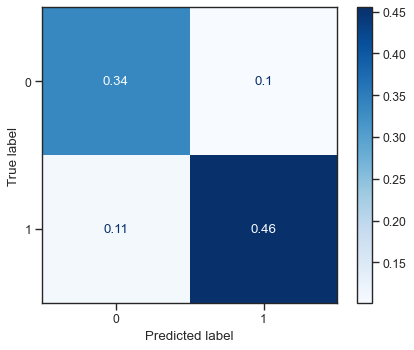

In [99]:
skm.plot_confusion_matrix(modelo, X_test, y_test, normalize='all', cmap='Blues')

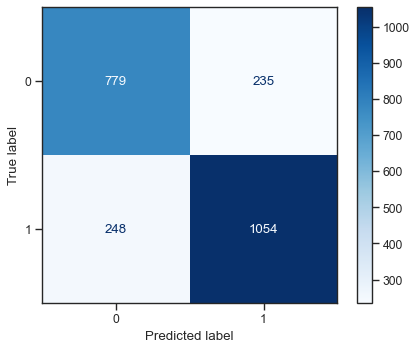

In [100]:
skm.plot_confusion_matrix(modelo, X_test, y_test, cmap='Blues')

# Reporting visual de los resultados (casero)

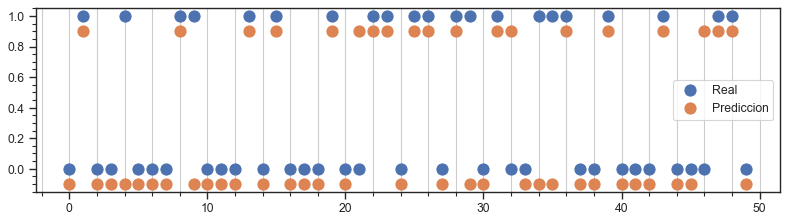

In [101]:
real = np.array(y_test[-50:])
pred = np.array(y_pred[-50:])

fig, ax = plt.subplots(figsize=(12,3))

ax.plot(real, lw=0, markersize=10, marker='o', label='Real')
ax.plot(pred-0.1, lw=0, markersize=10, marker='o', label='Prediccion')

plt.minorticks_on()
ax.grid(which='both', axis='x')

plt.legend()
plt.show()

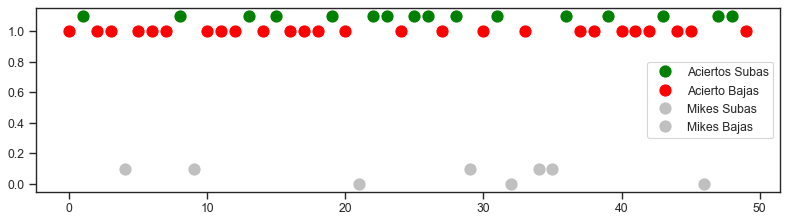

In [102]:
aciertos_bajas = np.where((real==pred) & (real==0), 1,np.nan)
aciertos_subas = np.where((real==pred) & (real==1), 1,np.nan)

mikes_bajas = np.where((real!=pred) & (real==0), 0,np.nan)
mikes_subas = np.where((real!=pred) & (real==1), 0,np.nan)


fig, ax = plt.subplots(figsize=(12,3))
ax.plot(aciertos_subas+0.1, lw=0, markersize=10, marker='o', color='green', label='Aciertos Subas')
ax.plot(aciertos_bajas, lw=0, markersize=10, marker='o', color='red', label='Acierto Bajas')

ax.plot(mikes_subas+0.1, lw=0, markersize=10, marker='o', color='silver', label='Mikes Subas')
ax.plot(mikes_bajas, lw=0, markersize=10, marker='o', color='silver', label='Mikes Bajas')

plt.legend()
plt.show()